# Explatoratory Data Analysis (EDA)

##### In this notebook, we'll be mainly using Fortune 100 stock companies by that I already fetched during the data wrangling steps to conclude how the market behaves. EDA will allow me to find patterns that is not obvious, there can ultimately be numerous patterns but I'll be looking at the ones that is essential for drawing insights. We don't need to make the data stationary since we'll be using the engineered technical features that we created previously which the model is well capable of handling. 

##### Some of the common patterns are seeing the top 10 stock annual return, comparing the fortune 100 trends behaviors, seeing stocks with the biggest growth between the 5 year span of data that I am using for this Capstone, and so on.

##### Since I do now have about 24 features that I engineered those can be used for EDA as well however they aren't necessarily as important in telling us anything since those are for more as features per stock rather than the stock as a whole.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sys 
import os
import seaborn as sns

In [4]:
file_path = "../data/fortune_100_cleaned.csv" 
fortune_100 = pd.read_csv(file_path)

In [6]:
print(fortune_100.head())
print(fortune_100.info())

  Ticker        Date   Open   High    Low  Close       Volume  LogRet_1D  \
0   AAPL  2019-01-02  36.85  37.80  36.70  37.58  148158800.0        NaN   
1   AAPL  2019-01-03  34.26  34.67  33.79  33.83  365248800.0   -0.10512   
2   AAPL  2019-01-04  34.39  35.35  34.22  35.28  234428400.0    0.04197   
3   AAPL  2019-01-07  35.38  35.41  34.72  35.20  219111200.0   -0.00227   
4   AAPL  2019-01-08  35.59  36.12  35.34  35.87  164101200.0    0.01886   

   LogRet_2D  LogRet_3D  ...  EMA_200  RSI_14  RollRetSum_3  RollRetSum_5  \
0        NaN        NaN  ...    37.58     NaN           NaN           NaN   
1        NaN        NaN  ...    37.54    0.00           NaN           NaN   
2   -0.06316        NaN  ...    37.52   29.40           NaN           NaN   
3    0.03970   -0.06543  ...    37.50   28.89       -0.0654           NaN   
4    0.01659    0.05855  ...    37.48   38.43        0.0586           NaN   

   RollRetSum_10  Volatility_10D  MACD_Line  MACD_Signal  MACD_Hist  \
0        

# Top 10 Stocks by Cumulative Return (5-Year Period)

C:\Users\soka\AppData\Local\Temp\ipykernel_31168\828409929.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Ticker', y="CumReturn", palette="viridis", legend=False)


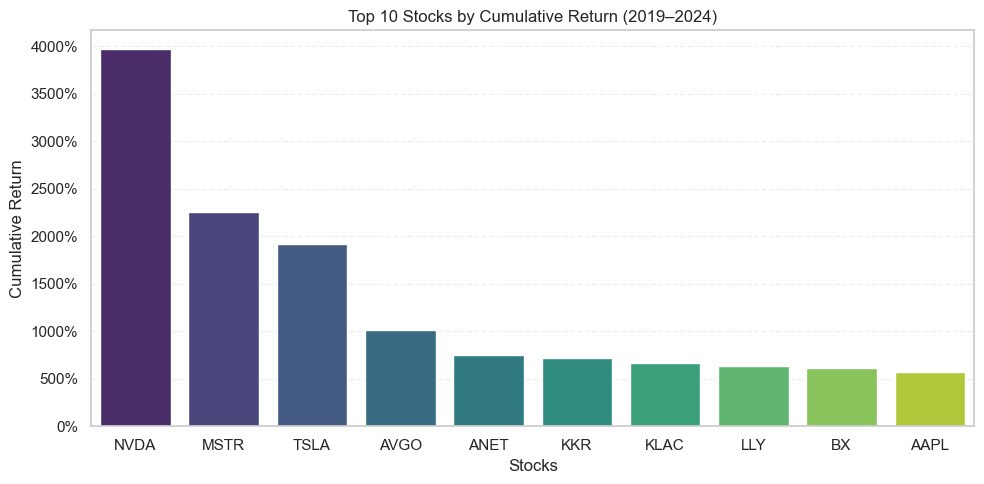

,Ticker,First_Close,Last_Close,CumReturn,CumReturnPct
70,NVDA,3.38,137.47,39.671598,3967.16
64,MSTR,12.86,302.96,22.558320,2255.83
90,TSLA,20.67,417.41,19.194001,1919.40
13,AVGO,21.08,234.32,10.115750,1011.57
10,ANET,13.16,111.45,7.468845,746.88
52,KKR,18.13,147.78,7.151131,715.11
53,KLAC,82.72,629.32,6.607834,660.78
55,LLY,104.67,769.24,6.349193,634.92
20,BX,23.60,168.38,6.134746,613.47
0,AAPL,37.58,251.31,5.687334,568.73


In [17]:
fortune_100["Date"] = pd.to_datetime(fortune_100["Date"])

# Set your study window
start, end = "2019-01-01", "2024-12-31"
mask = (fortune_100["Date"] >= start) & (fortune_100["Date"] <= end)
dfw = fortune_100.loc[mask, ["Ticker", "Date", "Close"]].dropna()

# sort for chronological order
dfw = dfw.sort_values(["Ticker", "Date"])
agg = (dfw.groupby("Ticker").agg(First_Close=("Close", "first"), Last_Close=("Close", "last")).reset_index())

# Cumulative return
agg["CumReturn"] = agg["Last_Close"] / agg["First_Close"] - 1.0

top10 = agg.sort_values("CumReturn", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top10, x='Ticker', y="CumReturn", palette="viridis", legend=False)
plt.title("Top 10 Stocks by Cumulative Return (2019–2024)")
plt.ylabel("Cumulative Return")
plt.xlabel("Stocks")

# Format y-axis as %
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

top10[["Ticker", "First_Close", "Last_Close", "CumReturn"]].assign(CumReturnPct=(top10["CumReturn"]*100).round(2))

# Top 10 Stocks by Cumulative Return (5-Year Period) Summary
##### We can see that NVDA had the biggest growth with a **3800%** `($3.38 to $137.47)` return from 2019 to 2024, that is quite staggering since NVDA is still leading in the SPY 500 as of now with a market cap of $4.157 trillion representing 8% of the total SPY 500. Some of these are quite hard to believe since 5 years ago a lot of people know about these stocks but didn't think they would jump that greatly. I started trading around 2020 and I definitely missed out on some very big investments. The top 10 stocks heavily seems to be leading in tech sector. This shows that technology makes up the majority market sector.

# Rolling 1-Year Volatility 

##### Check the volatility insights to check how the stock performed during the 5 year span to see if volatility peaked or not during Covid or other times.

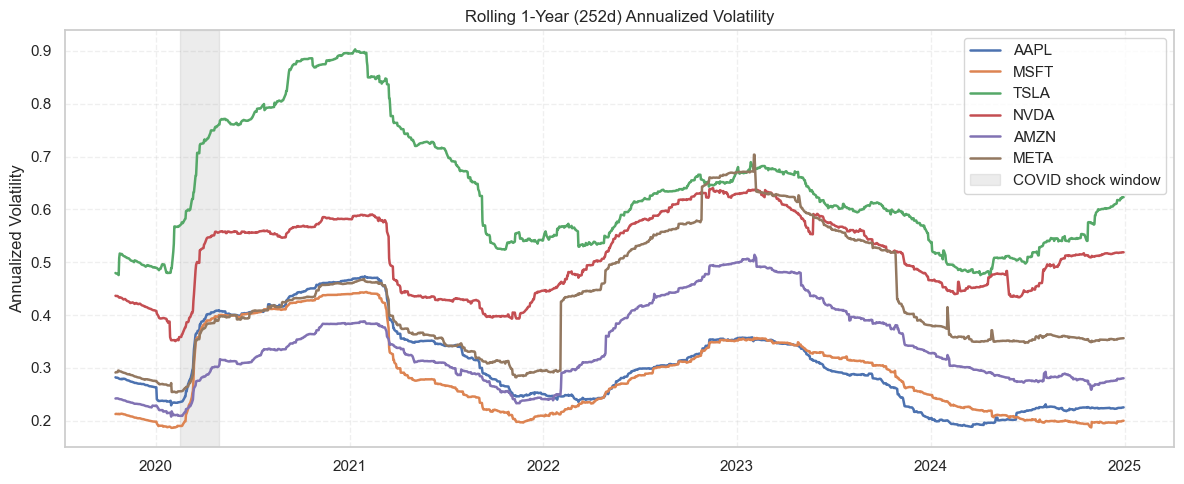

In [ ]:
fortune_100["Date"] = pd.to_datetime(fortune_100["Date"])
fortune_100 = fortune_100.sort_values(["Ticker", "Date"])

# if LogRet_1D isn't present for some reason, compute it
if "LogRet_1D" not in fortune_100.columns:
    fortune_100["LogRet_1D"] = ( fortune_100.groupby("Ticker")["Close"].transform(lambda s: np.log(s / s.shift(1))) )

# 252-day rolling std of daily returns, annualized
roll_win = 252
fortune_100["AnnVol_252"] = (
    fortune_100.groupby("Ticker")["LogRet_1D"]
    .transform(lambda s: s.rolling(roll_win, min_periods=200).std(ddof=0))
    * np.sqrt(252)
)

tickers_to_plot = ["AAPL", "MSFT", "TSLA", "NVDA", "AMZN", "GOOGL", "META"]
df_plot = (fortune_100.loc[fortune_100["Ticker"].isin(tickers_to_plot), ["Ticker", "Date", "AnnVol_252"]].dropna())

plt.figure(figsize=(12, 5))
for tk in tickers_to_plot:
    sub = df_plot[df_plot["Ticker"] == tk]
    if not sub.empty:
        plt.plot(sub["Date"], sub["AnnVol_252"], label=tk, linewidth=1.8)

# highlight early 2020 COVID shock
try:
    plt.axvspan(pd.to_datetime("2020-02-15"),
                pd.to_datetime("2020-04-30"),
                color="gray", alpha=0.15, label="COVID shock window")
except Exception:
    pass

plt.title("Rolling 1-Year (252d) Annualized Volatility")
plt.ylabel("Annualized Volatility")
plt.xlabel("")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


# Rolling 1-Year Volatility Summary
##### According to the chart it confirms that during early 2020 during the COVID shock window markets become very unpredictable with huge prices swings. The volatility stayed high from early 2020 into 2021, showing uncertainty when big news come out that affects the entire economic market as a whole. After 2021 volatility dropped gradually started to declone and hover below 5, showing that stock prices movement weren't as extreme anymore and the market began to stabilize.

#  Correlation Heatmap of Features

Text(0.5, 1.0, 'Correlation Heatmap of Engineered Features')

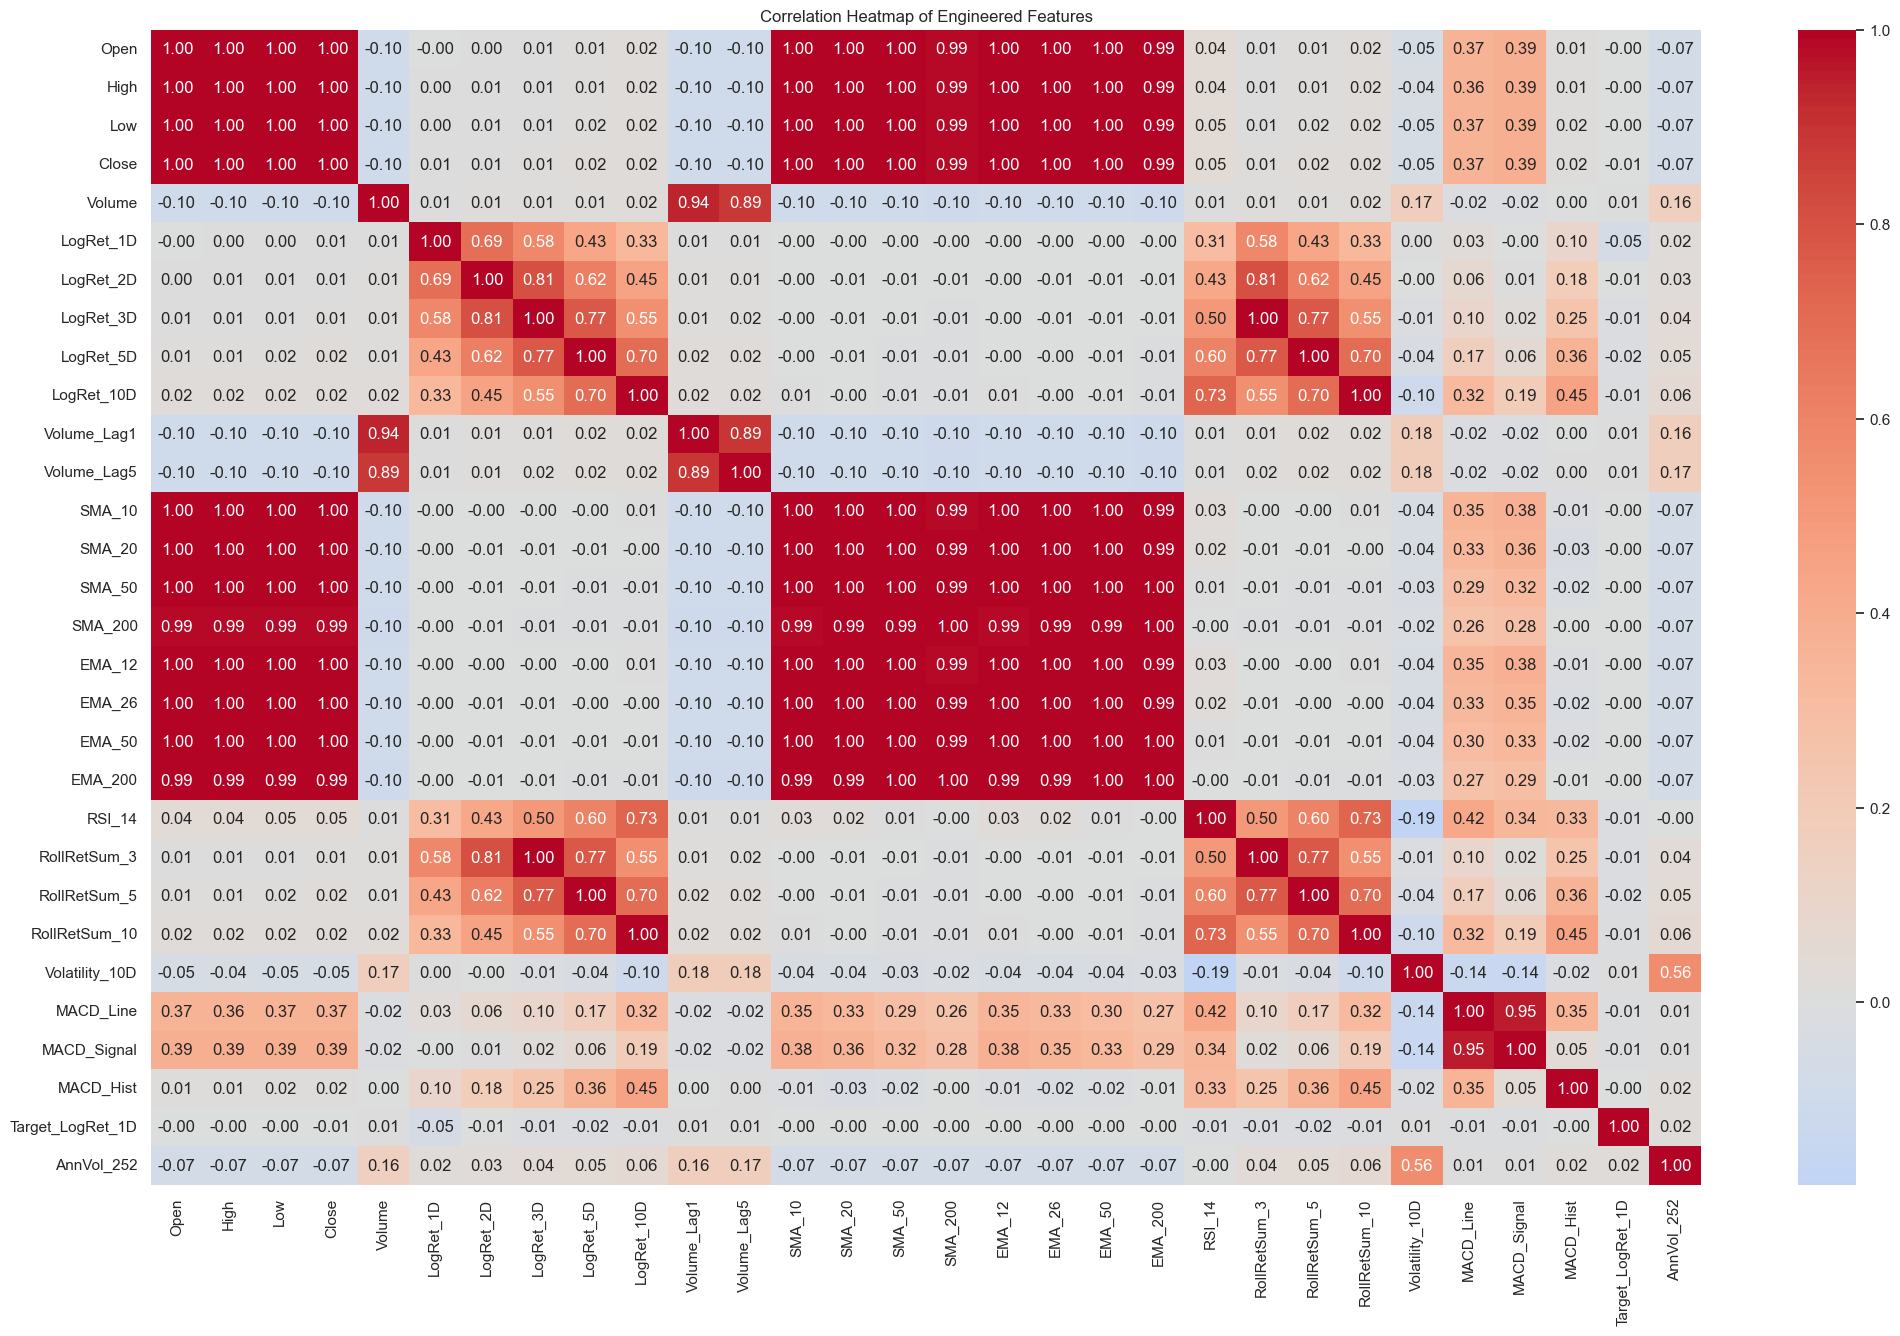

In [30]:
# Select only numeric columns for correlation
num_cols = fortune_100.select_dtypes(include='number').columns
corr = fortune_100[num_cols].corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")  # annot=True shows numbers
plt.title("Correlation Heatmap of Engineered Features")

# Heatmap Correlation Summary
##### This heatmap shows a lot of strong 1.0 correlations between SMA10 - SMA200, and similarly for EMA, this will introduce multicollinearity. Essentially if this columns tell the same thing there won't necessarily be a need to include that mean technical features of the same indicator. They have the same price series just different window lengths. This can make the impact of each independent variable to determine the dependent variable more unstable and less precise in predictions.

# Stock charts

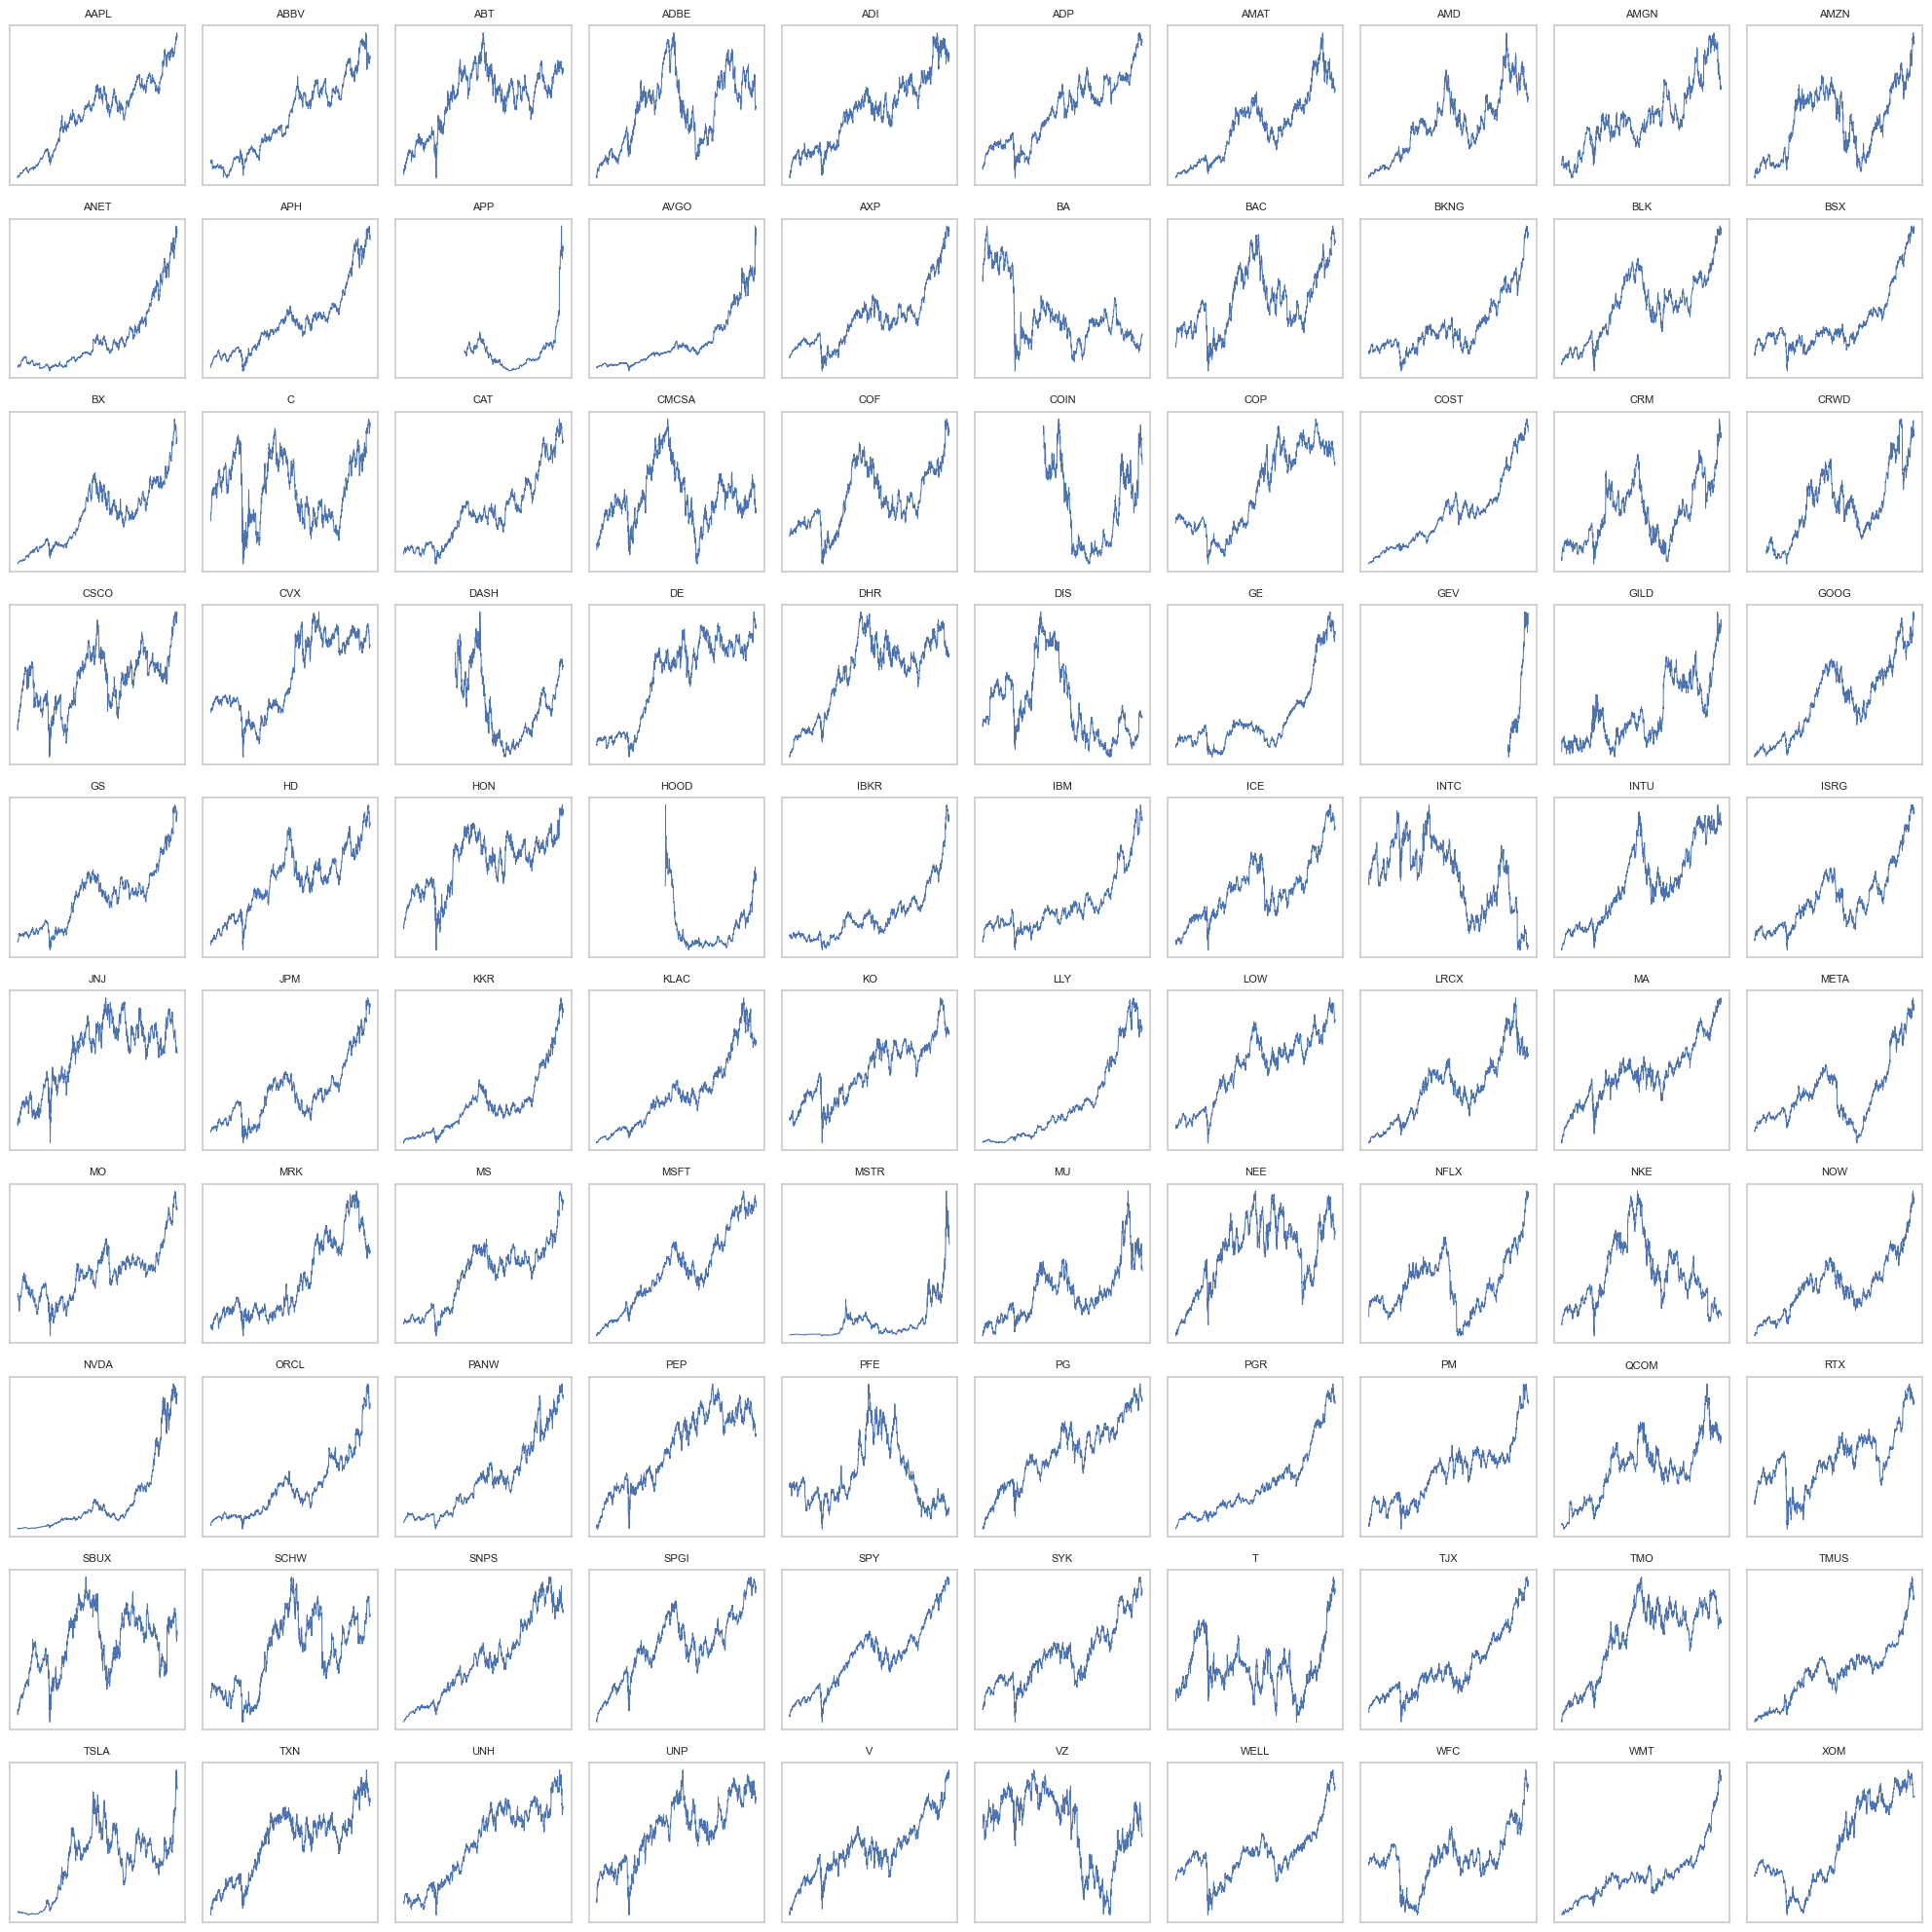

In [31]:
import matplotlib.pyplot as plt

tickers = fortune_100['Ticker'].unique()
n = len(tickers)
cols = 10
rows = n // cols + int(n % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, 2*rows), sharex=True)
for i, ticker in enumerate(tickers):
    ax = axes[i // cols, i % cols]
    sub = fortune_100[fortune_100['Ticker'] == ticker]
    ax.plot(sub['Date'], sub['Close'], linewidth=0.7)
    ax.set_title(ticker, fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

# Fortune 100 vs SPY 500

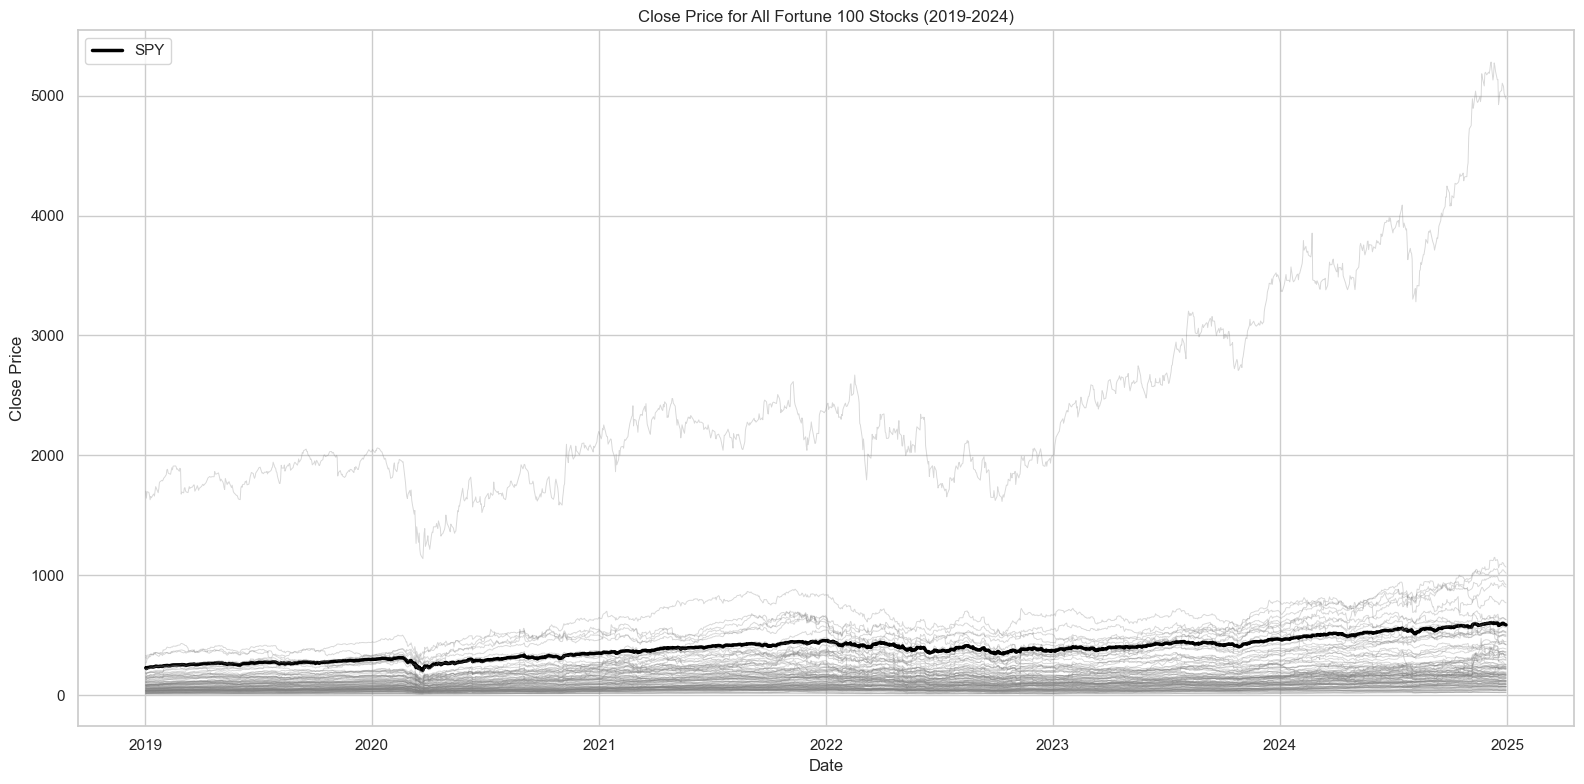

In [38]:
plt.figure(figsize=(16, 8))

for ticker in tickers:
    sub = fortune_100[fortune_100['Ticker'] == ticker]
    if ticker == 'SPY':
        plt.plot(sub['Date'], sub['Close'], color='black', linewidth=2.5, label='SPY')  # Emphasize SPY
    else:
        plt.plot(sub['Date'], sub['Close'], alpha=0.3, linewidth=0.7, color='gray', label='_nolegend_')  # Other stocks, no legend

plt.title("Close Price for All Fortune 100 Stocks (2019-2024)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

# Findings for Fortune 100 vs SPY 500
##### Since we know that SPY 500 which consists of the Fortune top 100 stocks they are likely to follow similar patterns as we can see in this that a lot of stocks indeed does follow the same pattern as the ETF SPY 500. This EDA indicates that the chart are correlated since it is a part of the bigger whole which is all of the 500 stocks that follows this pattern behavior.

# Maximum Drawdown

C:\Users\soka\AppData\Local\Temp\ipykernel_31168\3279913182.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drawdown_df, x='Ticker', y='MaxDrawdown', palette='coolwarm')


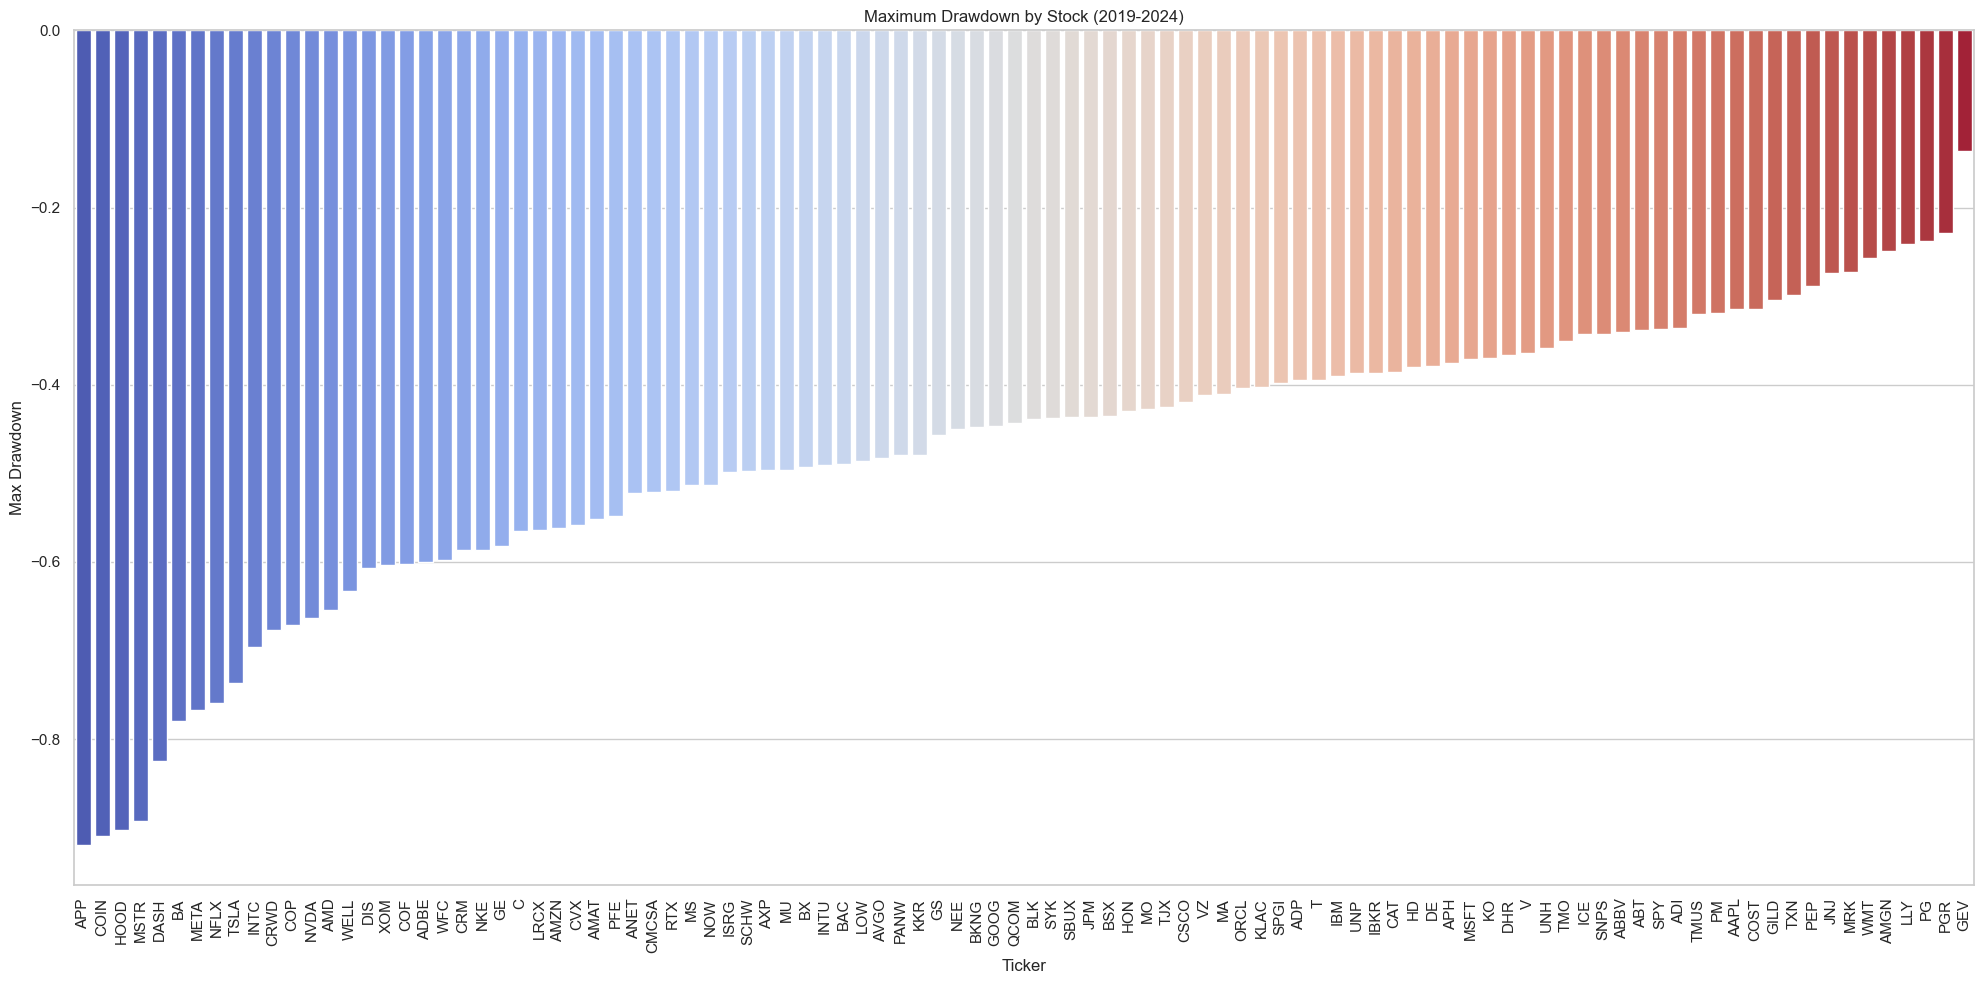

In [42]:
drawdowns = []
for ticker in fortune_100['Ticker'].unique():
    sub = fortune_100[fortune_100['Ticker'] == ticker].sort_values('Date')
    running_max = sub['Close'].cummax()
    dd = (sub['Close'] - running_max) / running_max
    min_dd = dd.min()
    drawdowns.append({'Ticker': ticker, 'MaxDrawdown': min_dd})

drawdown_df = pd.DataFrame(drawdowns).sort_values('MaxDrawdown')
plt.figure(figsize=(20, 10))
sns.barplot(data=drawdown_df, x='Ticker', y='MaxDrawdown', palette='coolwarm')
plt.title('Maximum Drawdown by Stock (2019-2024)')
plt.ylabel('Max Drawdown')
plt.xlabel('Ticker')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Findings for Maximum Drawdown